# Types of Unsupervised Learning Algorithms

Unsupervised learning algorithms are used when we have no labeled output data. These algorithms discover hidden patterns or intrinsic structures in the input data. Unlike supervised learning, unsupervised learning does not rely on labeled data and is often used for clustering and dimensionality reduction.

In this notebook, we will cover the following unsupervised learning algorithms:

1. k-Means Clustering
2. Hierarchical Clustering
3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
4. PCA (Principal Component Analysis)
5. t-SNE (t-distributed Stochastic Neighbor Embedding)
6. Apriori Algorithm (Association Rule Learning)

---

## Table of Contents

1. [k-Means Clustering](#1-k-means-clustering)
2. [Hierarchical Clustering](#2-hierarchical-clustering)
3. [DBSCAN](#3-dbscan)
4. [Principal Component Analysis (PCA)](#4-principal-component-analysis-pca)
5. [t-SNE](#5-t-sne)
6. [Apriori Algorithm](#6-apriori-algorithm)

---

## 1. k-Means Clustering
k-Means is one of the most popular clustering algorithms. It partitions the data into k distinct clusters, where each point belongs to the cluster with the nearest mean. It's used when the number of clusters is known in advance.

### Usage Areas:
- Customer segmentation
- Document clustering
- Image compression


In [3]:
import warnings
warnings.filterwarnings("ignore")

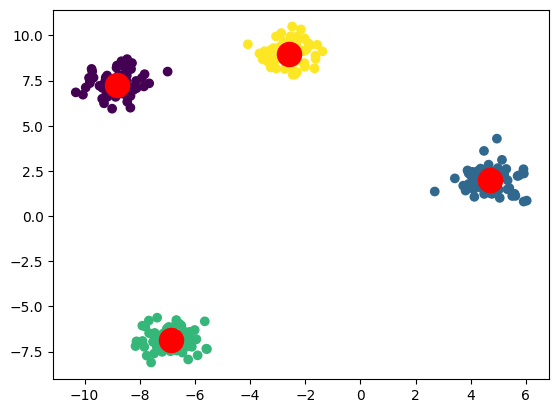

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_,cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## 2. Hierarchical Clustering
Hierarchical clustering is a method that builds a hierarchy of clusters. It can be either agglomerative (bottom-up) or divisive (top-down). It does not require the number of clusters to be predefined, making it a flexible choice for many applications.

### Usage Areas:
- Social network analysis
- Gene expression data analysis
- Hierarchical document clustering

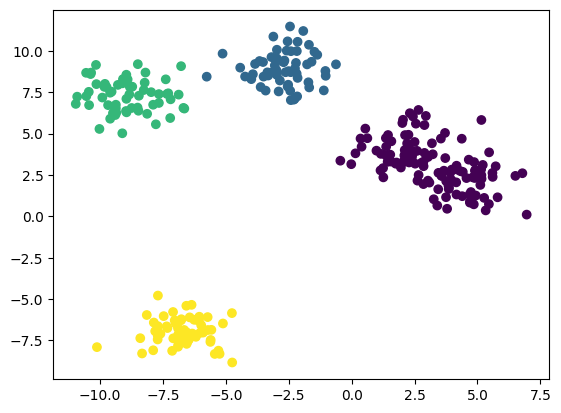

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X,_ = make_blobs(n_samples=300,centers=5,random_state=42)

hc = AgglomerativeClustering(n_clusters=4)
hc_labels = hc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=hc_labels, cmap='viridis')
plt.show()

## 3. DBSCAN 

DBSCAN is a density-based clustering algorithm that groups points close to each other based on a distance measure. It is effective at finding clusters of arbitrary shape and is robust to noise.

### Usage Areas:
- Geospatial analysis
- Anomaly detection
- Image segmentation

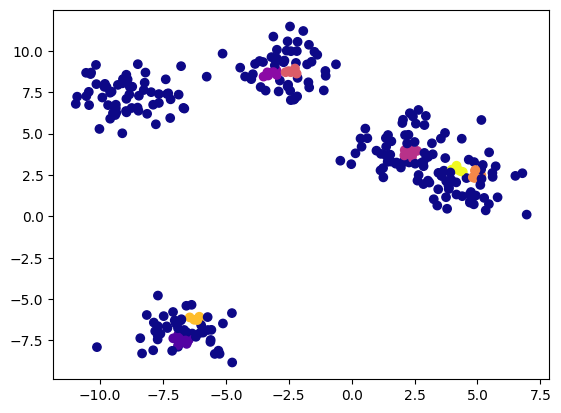

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=.3,min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=dbscan_labels,cmap="plasma")
plt.show()

## 4. Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique used to reduce the number of input features while preserving the variance in the data. It projects the data onto a lower-dimensional space, making it useful for visualization and speeding up machine learning algorithms.

### Usage Areas:
- Dimensionality reduction for visualization
- Speeding up machine learning algorithms
- Feature extraction


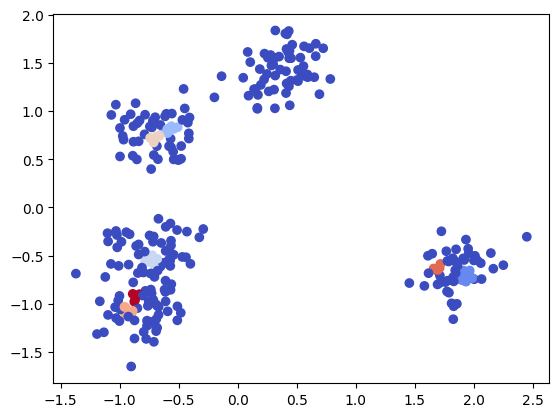

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0],X_pca[:,1],c=dbscan_labels,cmap="coolwarm")
plt.show()

## 5. t-SNE
t-SNE is a nonlinear dimensionality reduction technique used for the visualization of high-dimensional data. It preserves the local structure of the data, making it ideal for visualizing clusters in 2D or 3D spaces.

### Usage Areas:
- Visualizing high-dimensional data
- Exploring clusters in complex datasets
- Feature analysis

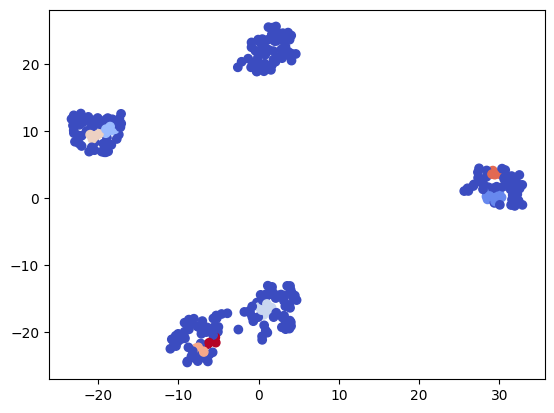

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:,0],X_tsne[:,1],c=dbscan_labels,cmap="coolwarm")
plt.show()

## 6. Apriori Algorithm

The Apriori algorithm is used in association rule learning to identify frequent itemsets in large datasets and to derive association rules. It's widely used in market basket analysis to find products that are frequently bought together.

### Usage Areas:
- Market basket analysis
- Recommender systems
- Customer behavior analysis

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

data = {'Milk': [1, 0, 1, 1, 0],
        'Bread': [1, 1, 1, 1, 1],
        'Butter': [0, 1, 0, 1, 0]}

df = pd.DataFrame(data)

frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(rules)